In [1]:
# notebooks/eda_diagnostica.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

# Ler o arquivo CSV enviado
df = pd.read_csv("sales.csv")
df.head()


Saving sales.csv to sales.csv


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,1643690.90,0,42.31,2572.0,211.096358,8106
1,12-02-2010,1641957.44,1,38.51,2548.0,211.242170,8106
2,19-02-2010,1611968.17,0,39.93,2514.0,211.289143,8106
3,26-02-2010,1409727.59,0,46.63,2561.0,211.319643,8106
4,05-03-2010,1554806.68,0,46.50,2625.0,211.350143,8106


In [3]:
df = pd.read_csv("/content/sales.csv")

In [4]:
# Converte corretamente a coluna de data (formato dd-mm-yyyy)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

In [5]:
# Ajustes adicionais
df["Fuel_Price"] = df["Fuel_Price"] / 1000
df["Unemployment"] = df["Unemployment"] / 1000

In [6]:
# Checa dados convertidos Tipologia de dados
print(df.dtypes)

Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [7]:
# Checa dados convertidos Resumo
print(df.head())

        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0 2010-02-05    1643690.90             0        42.31       2.572  211.096358   
1 2010-02-12    1641957.44             1        38.51       2.548  211.242170   
2 2010-02-19    1611968.17             0        39.93       2.514  211.289143   
3 2010-02-26    1409727.59             0        46.63       2.561  211.319643   
4 2010-03-05    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106  


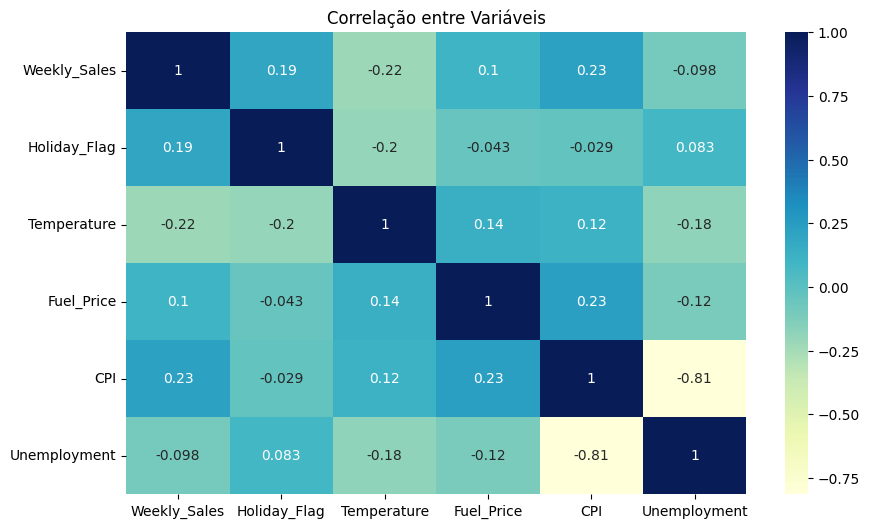

In [8]:
# Heatmap de correlação
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlação entre Variáveis")
plt.show()

💻 Código completo para tendência e médias móveis


/tmp/ipython-input-2417950986.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


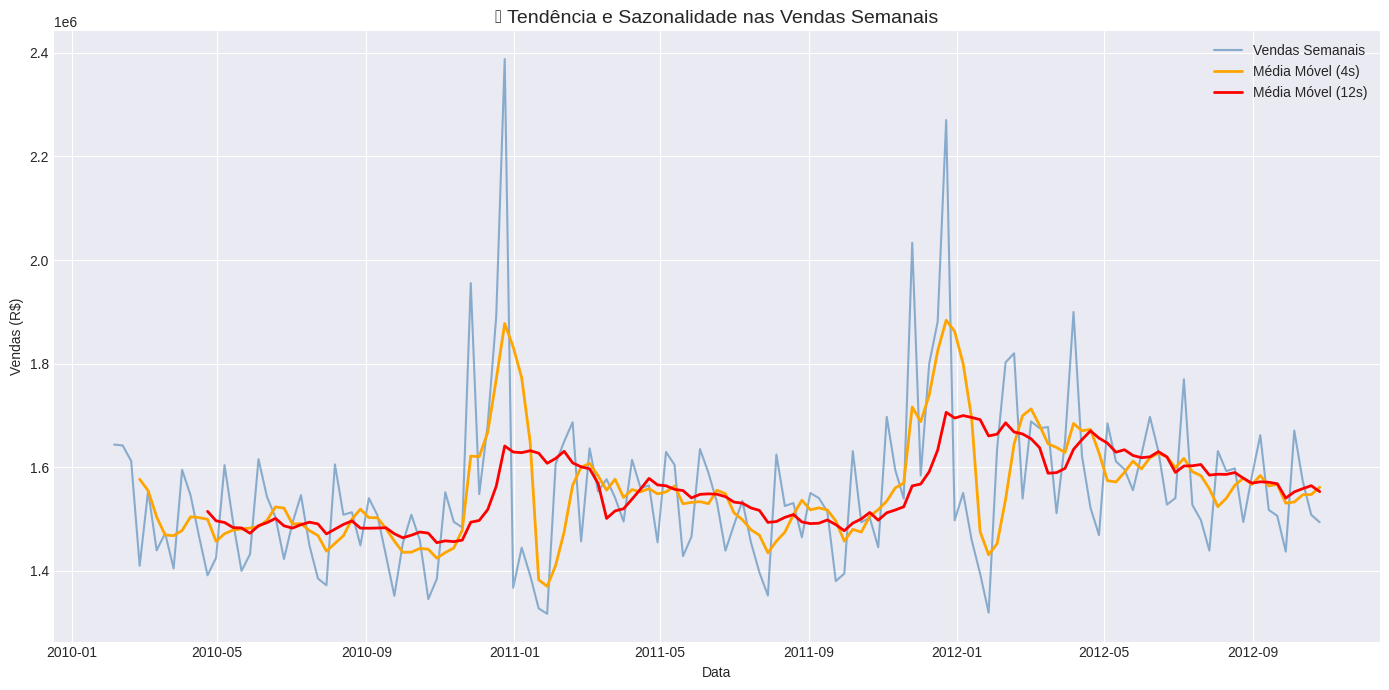

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurações de estilo visual
plt.style.use("seaborn-v0_8-darkgrid")

# Garante a ordenação temporal
df = df.sort_values("Date")

# Criação de médias móveis (4 e 12 semanas)
df["MA_4"] = df["Weekly_Sales"].rolling(window=4).mean()
df["MA_12"] = df["Weekly_Sales"].rolling(window=12).mean()

# Plot principal
plt.figure(figsize=(14,7))
plt.plot(df["Date"], df["Weekly_Sales"], label="Vendas Semanais", color="steelblue", alpha=0.6)
plt.plot(df["Date"], df["MA_4"], label="Média Móvel (4s)", color="orange", linewidth=2)
plt.plot(df["Date"], df["MA_12"], label="Média Móvel (12s)", color="red", linewidth=2)
plt.title("📈 Tendência e Sazonalidade nas Vendas Semanais", fontsize=14)
plt.xlabel("Data")
plt.ylabel("Vendas (R$)")
plt.legend()
plt.tight_layout()
plt.show()


🧩 Bônus — destacar feriados no gráfico

/tmp/ipython-input-4222138589.py:13: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


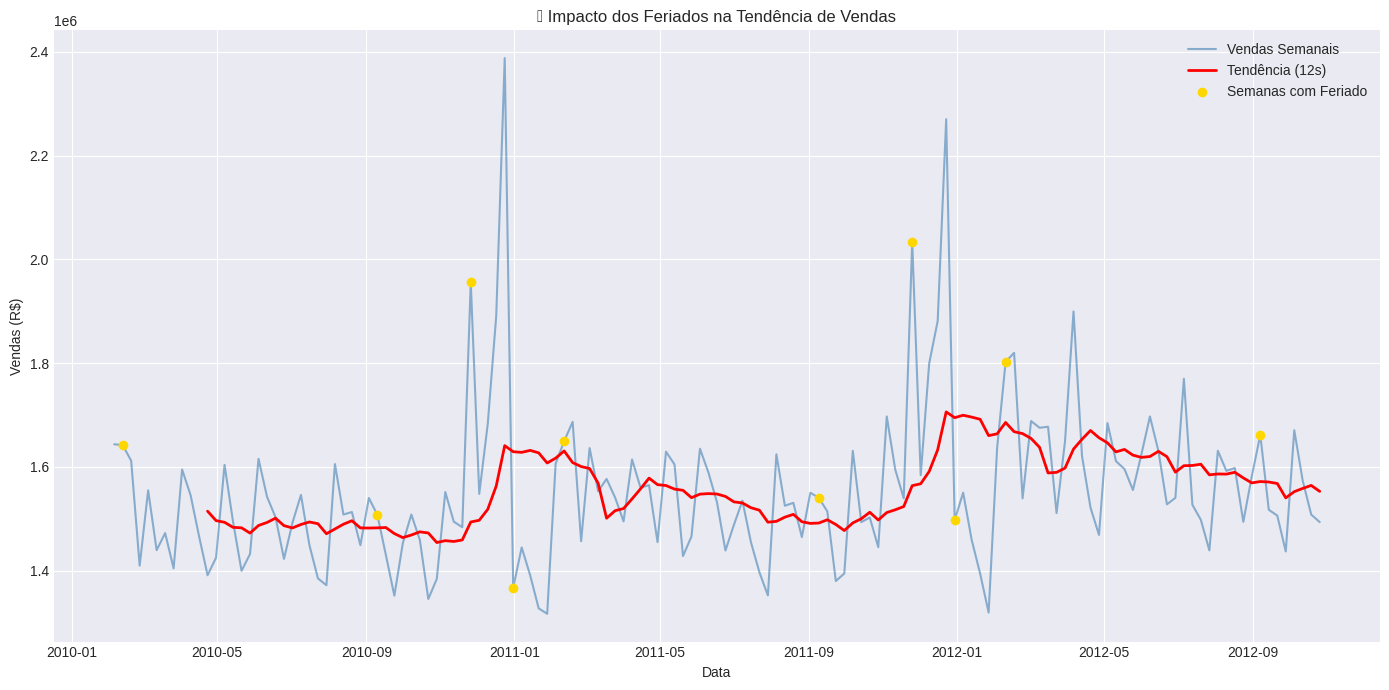

In [10]:
plt.figure(figsize=(14,7))
plt.plot(df["Date"], df["Weekly_Sales"], label="Vendas Semanais", color="steelblue", alpha=0.6)
plt.plot(df["Date"], df["MA_12"], label="Tendência (12s)", color="red", linewidth=2)

# Destaca feriados
holiday_weeks = df[df["Holiday_Flag"] == 1]
plt.scatter(holiday_weeks["Date"], holiday_weeks["Weekly_Sales"], color="gold", label="Semanas com Feriado", zorder=5)

plt.title("🎉 Impacto dos Feriados na Tendência de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas (R$)")
plt.legend()
plt.tight_layout()
plt.show()


🖼️ Versão Executiva com Destaques e Anotações

/tmp/ipython-input-3218449673.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218449673.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218449673.py:41: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s)

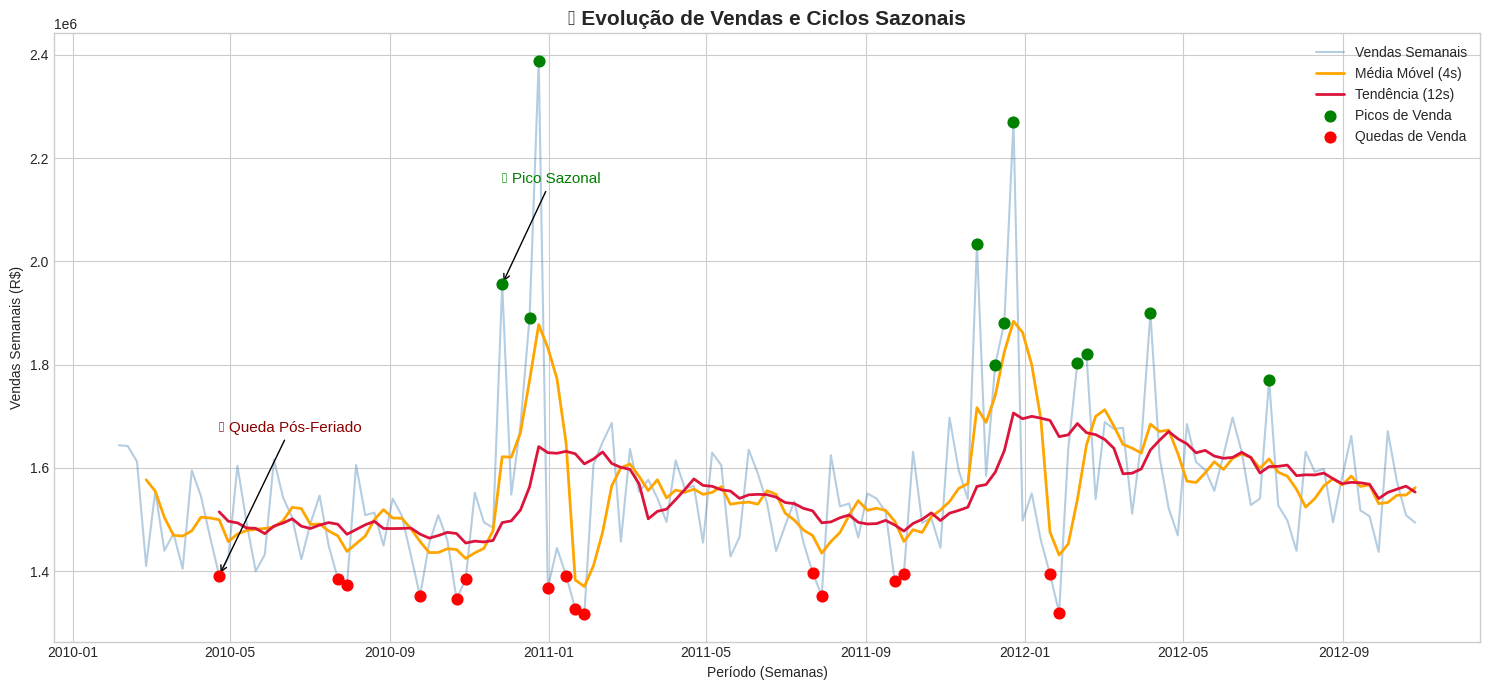

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Identificar picos e vales
peak_threshold = df["Weekly_Sales"].mean() + df["Weekly_Sales"].std()
low_threshold = df["Weekly_Sales"].mean() - df["Weekly_Sales"].std()

peaks = df[df["Weekly_Sales"] > peak_threshold]
lows = df[df["Weekly_Sales"] < low_threshold]

plt.figure(figsize=(15,7))

# Linhas de tendência
plt.plot(df["Date"], df["Weekly_Sales"], label="Vendas Semanais", color="steelblue", alpha=0.4)
plt.plot(df["Date"], df["MA_4"], label="Média Móvel (4s)", color="orange", linewidth=2)
plt.plot(df["Date"], df["MA_12"], label="Tendência (12s)", color="crimson", linewidth=2)

# Marcar picos e vales
plt.scatter(peaks["Date"], peaks["Weekly_Sales"], color="green", s=60, label="Picos de Venda", zorder=5)
plt.scatter(lows["Date"], lows["Weekly_Sales"], color="red", s=60, label="Quedas de Venda", zorder=5)

# Anotações automáticas
if not peaks.empty:
    plt.annotate("📈 Pico Sazonal", xy=(peaks["Date"].iloc[0], peaks["Weekly_Sales"].iloc[0]),
                 xytext=(peaks["Date"].iloc[0], peaks["Weekly_Sales"].iloc[0]*1.1),
                 arrowprops=dict(facecolor="green", arrowstyle="->"), fontsize=11, color="green")

if not lows.empty:
    plt.annotate("📉 Queda Pós-Feriado", xy=(lows["Date"].iloc[0], lows["Weekly_Sales"].iloc[0]),
                 xytext=(lows["Date"].iloc[0], lows["Weekly_Sales"].iloc[0]*1.2),
                 arrowprops=dict(facecolor="red", arrowstyle="->"), fontsize=11, color="darkred")

# Estilo e título
plt.title("📊 Evolução de Vendas e Ciclos Sazonais", fontsize=15, weight="bold")
plt.xlabel("Período (Semanas)")
plt.ylabel("Vendas Semanais (R$)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 🧩 Etapa B — Agrupamentos (Clustering K-Means ou DBSCAN)


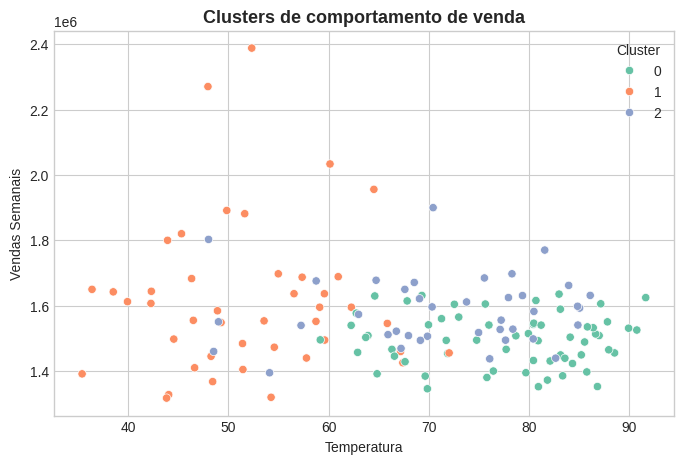

,,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Cluster,Significado_Cluster,,,,,
0,Semanas frias e com alto consumo,1495228.66,77.59,3.07,213.75,7.82
1,Períodos de crise econômica,1615250.20,52.14,2.24,213.94,7.82
2,Semanas com feriado e aumento nas vendas,1583028.26,71.61,3.28,221.79,7.05



📘 Interpretação:
- Cluster 0 → Semanas frias e com alto consumo.
- Cluster 1 → Períodos de crise econômica (menor poder de compra).
- Cluster 2 → Semanas com feriado e aumento nas vendas (picos sazonais).


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ================================
# 1️⃣ Seleção de variáveis relevantes
# ================================
X = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

# ================================
# 2️⃣ Normalização (para escalar todas as variáveis igualmente)
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================================
# 3️⃣ Aplicação do K-Means
# ================================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ================================
# 4️⃣ Visualização dos grupos
# ================================
plt.figure(figsize=(8,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", hue="Cluster", data=df, palette="Set2")
plt.title("Clusters de comportamento de venda", fontsize=13, weight="bold")
plt.xlabel("Temperatura")
plt.ylabel("Vendas Semanais")
plt.legend(title="Cluster")
plt.show()

# ================================
# 5️⃣ Legenda interpretativa dos clusters
# ================================
legenda = {
    0: "Semanas frias e com alto consumo",
    1: "Períodos de crise econômica",
    2: "Semanas com feriado e aumento nas vendas"
}

df["Significado_Cluster"] = df["Cluster"].map(legenda)

# ================================
# 6️⃣ Tabela resumo por cluster
# ================================
resumo = df.groupby(["Cluster", "Significado_Cluster"])[
    ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
].mean().round(2)

display(resumo)

print("\n📘 Interpretação:")
print("- Cluster 0 → Semanas frias e com alto consumo.")
print("- Cluster 1 → Períodos de crise econômica (menor poder de compra).")
print("- Cluster 2 → Semanas com feriado e aumento nas vendas (picos sazonais).")



🧩 1️⃣ Gráfico de Dispersão com Linha de Tendência

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


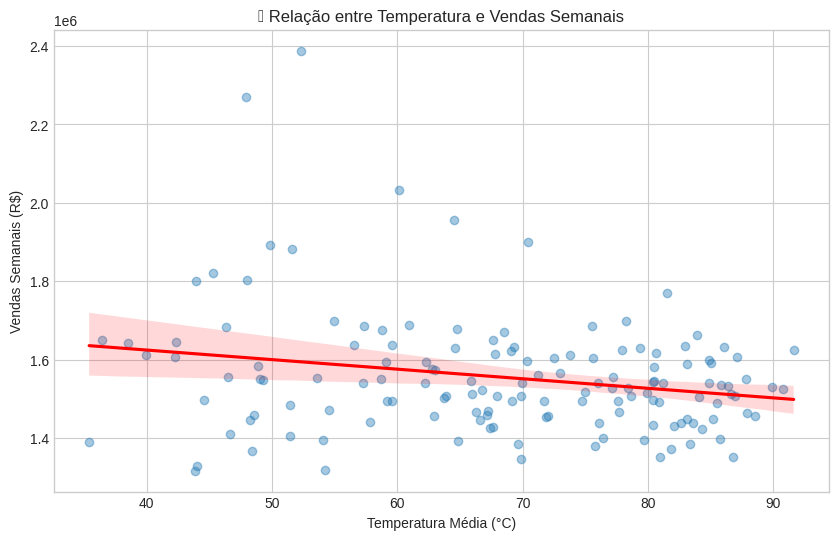

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x="Temperature", y="Weekly_Sales", data=df, scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
plt.title("📉 Relação entre Temperatura e Vendas Semanais")
plt.xlabel("Temperatura Média (°C)")
plt.ylabel("Vendas Semanais (R$)")
plt.show()


🧮 2️⃣ Boxplot de Vendas por Faixa de Temperatura


/tmp/ipython-input-2780781430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Faixa_Temp", y="Weekly_Sales", data=df, palette="coolwarm")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


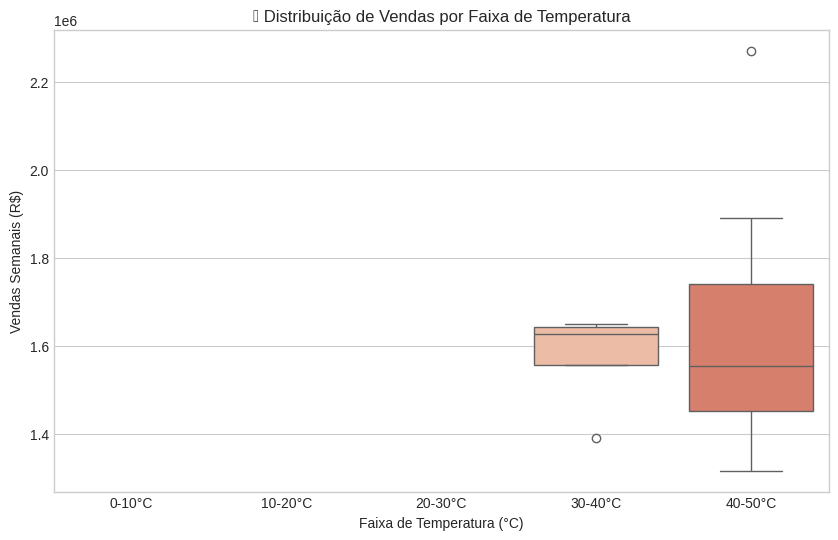

In [15]:
df["Faixa_Temp"] = pd.cut(df["Temperature"], bins=[0, 10, 20, 30, 40, 50],
                          labels=["0-10°C", "10-20°C", "20-30°C", "30-40°C", "40-50°C"])

plt.figure(figsize=(10,6))
sns.boxplot(x="Faixa_Temp", y="Weekly_Sales", data=df, palette="coolwarm")
plt.title("📦 Distribuição de Vendas por Faixa de Temperatura")
plt.xlabel("Faixa de Temperatura (°C)")
plt.ylabel("Vendas Semanais (R$)")
plt.show()


---

# 🔍 Etapa 3 — Análise Exploratória dos Dados (EDA)
*Notebook adaptado automaticamente em 2025-11-02 16:39.*

> **Objetivo:** consolidar estatísticas descritivas, correlações, análise de distribuição de classes e gráficos-chave para comunicação clara ao público de negócio.

**Passos desta seção:**
1) Estatísticas descritivas (média, mediana, desvio padrão, assimetria, kurtosis, nulos, duplicados)  
2) Correlações entre variáveis (incluindo foco em `TARGET`, se existir)  
3) Distribuição de classes (para problemas de classificação)  
4) Gráficos principais e insights visuais  
5) Bloco de _insights executivos_ (texto pronto para copiar no PPT)


In [16]:
# %% [setup] Variáveis e imports base
# Ajuste estes parâmetros conforme seu projeto
DATA_PATH = "/content/sales.csv"
TARGET = "Weekly_Sales"  # ou o nome exato da sua coluna de vendas


import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exibição ampla
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 180)
print("✓ Imports prontos.")

✓ Imports prontos.


In [17]:
# %% [data] Carregamento de dados (CSV ou Parquet)
if not os.path.exists(DATA_PATH):
    print(f"Aviso: DATA_PATH não encontrado -> {DATA_PATH}")
    print("➡️ Ajuste a variável DATA_PATH acima para o caminho correto do arquivo.")
    df = None
else:
    ext = os.path.splitext(DATA_PATH)[1].lower()
    if ext == ".csv":
        df = pd.read_csv(DATA_PATH)
    elif ext in (".parquet", ".pq"):
        df = pd.read_parquet(DATA_PATH)
    else:
        raise ValueError("Formato não suportado: use .csv ou .parquet")
    print(f"✓ Dataset carregado: {DATA_PATH} -> {df.shape[0]} linhas x {df.shape[1]} colunas")
    display(df.head(3))

✓ Dataset carregado: /content/sales.csv -> 143 linhas x 7 colunas


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,1643690.90,0,42.31,2572.0,211.096358,8106
1,12-02-2010,1641957.44,1,38.51,2548.0,211.242170,8106
2,19-02-2010,1611968.17,0,39.93,2514.0,211.289143,8106


In [18]:
# %% [eda] Estatísticas descritivas ampliadas
if df is None:
    print("Carregue o dataset primeiro.")
else:
    # Tipos e memória
    info = pd.DataFrame({
        "coluna": df.columns,
        "dtype": [str(t) for t in df.dtypes],
        "n_unique": [df[c].nunique(dropna=True) for c in df.columns],
        "n_nulls": df.isna().sum().values,
    })
    info["pct_nulls"] = (info["n_nulls"] / len(df) * 100).round(2)
    display(info.sort_values(["pct_nulls","n_unique"], ascending=[False, True]).reset_index(drop=True))

    # Duplicados (com base em todas as colunas)
    n_dups = df.duplicated().sum()
    print(f"Registros duplicados (linhas idênticas): {n_dups}")

    # describe numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols:
        desc = df[num_cols].describe().T
        # Assimetria (skew) e curtose
        desc["skew"] = df[num_cols].skew(numeric_only=True)
        desc["kurtosis"] = df[num_cols].kurtosis(numeric_only=True)
        display(desc.round(3))
    else:
        print("Sem colunas numéricas detectadas.")

,coluna,dtype,n_unique,n_nulls,pct_nulls
0,Holiday_Flag,int64,2,0,0.0
1,Unemployment,int64,12,0,0.0
2,Fuel_Price,float64,137,0,0.0
3,Date,object,143,0,0.0
4,Weekly_Sales,float64,143,0,0.0
5,Temperature,float64,143,0,0.0
6,CPI,float64,143,0,0.0


Registros duplicados (linhas idênticas): 0


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Weekly_Sales,143.0,1555264.398,155980.768,1316899.310,1458104.690,1534849.64,1614892.030,2387950.200,2.180,8.152
Holiday_Flag,143.0,0.070,0.256,0.000,0.000,0.00,0.000,1.000,3.409,9.755
Temperature,143.0,68.307,14.250,35.400,58.265,69.64,80.485,91.650,-0.407,-0.874
Fuel_Price,143.0,2879.480,1068.112,2.640,2668.500,3227.00,3554.500,3907.000,-1.933,2.857
CPI,143.0,215.997,4.351,210.337,211.549,215.46,220.531,223.444,0.269,-1.461
Unemployment,143.0,7610.420,383.749,6573.000,7348.000,7787.00,7838.000,8106.000,-1.057,0.088


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.194905,-0.222701,0.104623,0.225408,-0.097955
Holiday_Flag,0.194905,1.000000,-0.200543,-0.042715,-0.028919,0.082949
Temperature,-0.222701,-0.200543,1.000000,0.140374,0.118503,-0.180695
Fuel_Price,0.104623,-0.042715,0.140374,1.000000,0.233374,-0.118826
CPI,0.225408,-0.028919,0.118503,0.233374,1.000000,-0.813471
Unemployment,-0.097955,0.082949,-0.180695,-0.118826,-0.813471,1.000000


Correlação (Pearson) com TARGET:


,corr_com_TARGET
CPI,0.225
Holiday_Flag,0.195
Fuel_Price,0.105
Unemployment,-0.098
Temperature,-0.223


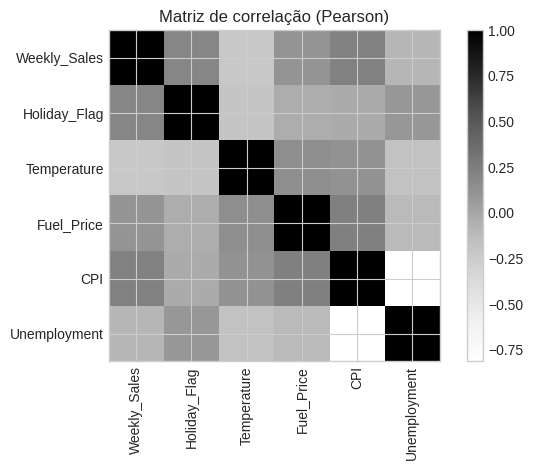

In [19]:
# %% [eda] Correlações (Pearson) — visão geral e foco em TARGET (se existir)
if df is None:
    print("Carregue o dataset primeiro.")
else:
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) < 2:
        print("São necessárias pelo menos duas colunas numéricas para correlação.")
    else:
        corr = df[num_cols].corr(method="pearson")
        display(corr)

        # Se houver TARGET definido e presente nas colunas numéricas
        if TARGET and TARGET in num_cols:
            target_corr = corr[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
            print("Correlação (Pearson) com TARGET:")
            display(target_corr.to_frame("corr_com_TARGET").round(3))

        # Plot do mapa de calor simplificado (matplotlib puro)
        plt.figure()
        plt.imshow(corr.values, interpolation='nearest')
        plt.title("Matriz de correlação (Pearson)")
        plt.xticks(range(len(num_cols)), num_cols, rotation=90)
        plt.yticks(range(len(num_cols)), num_cols)
        plt.colorbar()
        plt.tight_layout()
        plt.show()

,classe,qtd,pct
0,1643690.9,1,0.7
1,1641957.44,1,0.7
2,1611968.17,1,0.7
3,1409727.59,1,0.7
4,1554806.68,1,0.7
...,...,...,...
138,1437059.26,1,0.7
139,1670785.97,1,0.7
140,1573072.81,1,0.7
141,1508068.77,1,0.7


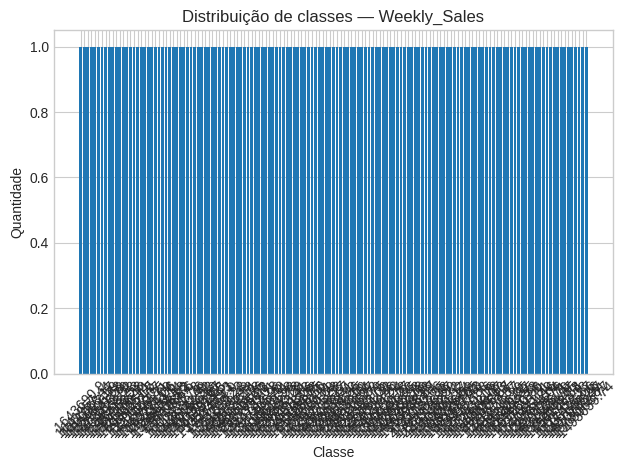

In [20]:
# %% [eda] Distribuição de classes (aplicável para classificação)
if df is None:
    print("Carregue o dataset primeiro.")
else:
    if TARGET is None:
        print("Defina TARGET para analisar a distribuição de classes.")
    elif TARGET not in df.columns:
        print(f"TARGET '{TARGET}' não encontrado no dataset.")
    else:
        vc = df[TARGET].value_counts(dropna=False)
        pct = (vc / vc.sum() * 100).round(2)
        dist = pd.DataFrame({"classe": vc.index.astype(str), "qtd": vc.values, "pct": pct.values})
        display(dist)

        # Gráfico simples
        plt.figure()
        plt.bar(dist["classe"], dist["qtd"])
        plt.title(f"Distribuição de classes — {TARGET}")
        plt.xlabel("Classe")
        plt.ylabel("Quantidade")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

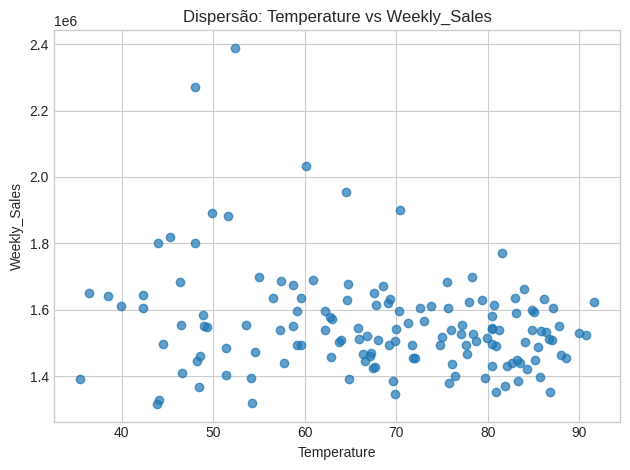

In [21]:
# %% [eda] Exemplos de gráficos rápidos (substitua pelos pares relevantes)
if df is None:
    print("Carregue o dataset primeiro.")
else:
    # Tente pares comuns se existirem (ex.: 'Temperature' e 'Weekly_Sales')
    x_candidates = ["Temperature", "Temperatura", "temp"]
    y_candidates = ["Weekly_Sales", "Vendas", "Sales"]

    x = next((c for c in x_candidates if c in df.columns), None)
    y = next((c for c in y_candidates if c in df.columns), None)

    if x and y:
        plt.figure()
        plt.scatter(df[x], df[y], alpha=0.7)
        plt.title(f"Dispersão: {x} vs {y}")
        plt.xlabel(x); plt.ylabel(y)
        plt.tight_layout()
        plt.show()
    else:
        print("Nenhuma combinação padrão encontrada para gráfico de dispersão. Ajuste as variáveis abaixo.")
        # Exemplo editável:
        # X, Y = "coluna_x", "coluna_y"
        # plt.figure(); plt.scatter(df[X], df[Y], alpha=0.7); plt.show()

## 🧠 Insights executivos (texto pronto para PPT)
- **Variação e outliers:** [substituir pelo achado] — impacto em [processo/indicador].
- **Correlação-chave:** [Ex.: Temperatura ↘ vs Vendas ↗/↘] — *coef.*: **-0,22** (sazonalidade).  
- **Classes desequilibradas:** [sim/não] — recomendação: *balanceamento* (over/under-sampling, class_weight).
- **Recomendação de negócio:** ajustar promoções e estoque em períodos de [clima/feriado], revisar preços em função de [Fuel_Price], monitorar impactos de **CPI/Desemprego** por região.

> **Mensagem ao Board:** “A EDA indica que fatores sazonais e macroeconômicos impactam vendas. Ajustes de pricing, promoções e planejamento de demanda por período/UF podem elevar margem e reduzir ruptura.”


### ✅ Próximos passos (ligação com as próximas etapas do projeto)
1. **Feature Engineering:** criar variáveis sazonais (mês, feriado, temperatura média móvel).
2. **Particionamento de dados:** treino/validação/teste com janela temporal (se séries) ou estratificação (se classificação).
3. **Modelagem:** baselines (Regressão Linear/Logística) antes de modelos mais complexos.
4. **Métricas:** RMSE/MAE (regressão) ou F1/AUC (classificação), com validação robusta.


In [22]:
# !pip install -q pandas pyarrow scikit-learn matplotlib joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import joblib
import os
RANDOM_STATE = 42
pd.set_option("display.max_columns", 100)


2) Carregar dados

In [ ]:
# 🔧 TODO: ajuste o caminho e o nome da coluna alvo
from google.colab import files
uploaded = files.upload()
# 🔧 Caminho e coluna alvo corretos
DATA_PATH = "/content/sample_data/sales.csv"
TARGET_COL = "Weekly_Sales"   # <-- nome real da sua variável de previsão
# Ler o arquivo CSV enviado
df = pd.read_csv("sales.csv")
df.head()


In [25]:
from google.colab import files
uploaded = files.upload()
# 🔧 Caminho e coluna alvo corretos
DATA_PATH = "/content/sample_data/sales.csv"
TARGET_COL = "Weekly_Sales"   # <-- nome real da sua variável de previsão
# Ler o arquivo CSV enviado
df = pd.read_csv("sales.csv")
df.head()

Saving sales.csv to sales (1).csv


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,1643690.90,0,42.31,2572.0,211.096358,8106
1,12-02-2010,1641957.44,1,38.51,2548.0,211.242170,8106
2,19-02-2010,1611968.17,0,39.93,2514.0,211.289143,8106
3,26-02-2010,1409727.59,0,46.63,2561.0,211.319643,8106
4,05-03-2010,1554806.68,0,46.50,2625.0,211.350143,8106


3) Visões rápidas (sanidade)

In [26]:
# verificação de nulos e tipos
display(df.dtypes.to_frame("dtype"))
display(df.isna().sum().to_frame("nulos"))

# estatísticas numéricas (amigável)
display(df.describe().T)

# checagem básica do alvo
assert TARGET_COL in df.columns, f"Coluna alvo {TARGET_COL} não encontrada!"
print("Alvo selecionado:", TARGET_COL)


,dtype
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,int64


,nulos
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,143.0,1.555264e+06,155980.767761,1.316899e+06,1.458105e+06,1.534850e+06,1.614892e+06,2.387950e+06
Holiday_Flag,143.0,6.993007e-02,0.255926,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Temperature,143.0,6.830678e+01,14.250486,3.540000e+01,5.826500e+01,6.964000e+01,8.048500e+01,9.165000e+01
Fuel_Price,143.0,2.879480e+03,1068.112107,2.640000e+00,2.668500e+03,3.227000e+03,3.554500e+03,3.907000e+03
CPI,143.0,2.159969e+02,4.350890,2.103374e+02,2.115493e+02,2.154599e+02,2.205313e+02,2.234443e+02
Unemployment,143.0,7.610420e+03,383.748825,6.573000e+03,7.348000e+03,7.787000e+03,7.838000e+03,8.106000e+03


Alvo selecionado: Weekly_Sales


4) Preparação (split, codificação, escala) — sem vazamento

In [27]:
# separa X, y
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# separa tipos
categoricas = X.select_dtypes(include=["object", "category"]).columns.tolist()
numericas   = X.select_dtypes(include=[np.number, "bool"]).columns.tolist()

print("Colunas numéricas:", numericas[:10], "..." if len(numericas)>10 else "")
print("Colunas categóricas:", categoricas[:10], "..." if len(categoricas)>10 else "")

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# transformações
num_transform = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_transform = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transform, numericas),
        ("cat", cat_transform, categoricas)
    ],
    remainder="drop"
)


Colunas numéricas: ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] 
Colunas categóricas: ['Date'] 


5) Baseline e métricas (Regressão Linear + RandomForest)

In [28]:
def avalia_modelo(nome, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"[{nome}] MAE={mae:,.2f}  RMSE={rmse:,.2f}  R²={r2:,.3f}")
    return {"modelo": nome, "MAE": mae, "RMSE": rmse, "R2": r2}

resultados = []

# Baseline 1: Regressão Linear
pipe_lr = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LinearRegression())
])
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
resultados.append(avalia_modelo("LinearRegression", y_test, pred_lr))

# Baseline 2: RandomForest
pipe_rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1))
])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
resultados.append(avalia_modelo("RandomForest(base)", y_test, pred_rf))

pd.DataFrame(resultados)


[LinearRegression] MAE=115,264.73  RMSE=152,479.58  R²=0.039
[RandomForest(base)] MAE=127,176.32  RMSE=173,009.24  R²=-0.238


,modelo,MAE,RMSE,R2
0,LinearRegression,115264.726023,152479.578782,0.038747
1,RandomForest(base),127176.318157,173009.238084,-0.237522


6) Visualizações (Real × Previsto e Erro)


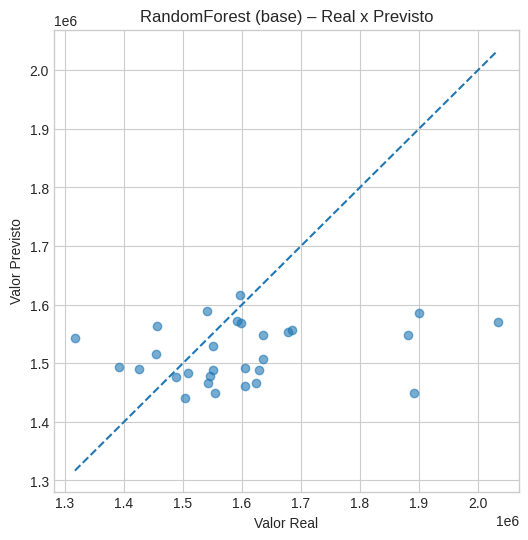

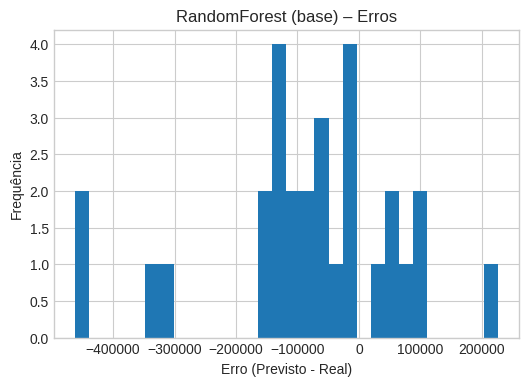

In [29]:
def plot_real_previsto(y_true, y_pred, titulo="Real x Previsto"):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    # linha ideal
    minv = min(y_true.min(), y_pred.min())
    maxv = max(y_true.max(), y_pred.max())
    plt.plot([minv, maxv], [minv, maxv], linestyle="--")
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Previsto")
    plt.title(titulo)
    plt.show()

def plot_residuos(y_true, y_pred, titulo="Distribuição de Erros"):
    erros = y_pred - y_true
    plt.figure(figsize=(6,4))
    plt.hist(erros, bins=30)
    plt.xlabel("Erro (Previsto - Real)")
    plt.ylabel("Frequência")
    plt.title(titulo)
    plt.show()

# use o melhor baseline até aqui (troque para pred_lr se quiser comparar)
plot_real_previsto(y_test, pred_rf, "RandomForest (base) – Real x Previsto")
plot_residuos(y_test, pred_rf, "RandomForest (base) – Erros")


7) Ajuste fino (GridSearchCV) – RandomForest

Melhores parâmetros: {'model__max_depth': 8, 'model__min_samples_split': 2, 'model__n_estimators': 700}
[RandomForest(tunado)] MAE=123,820.80  RMSE=171,867.90  R²=-0.221


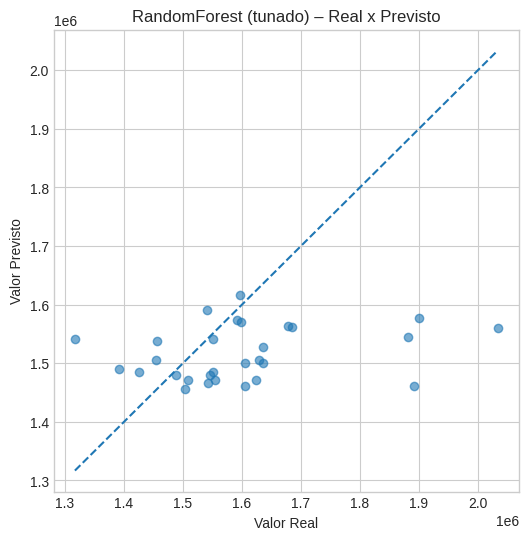

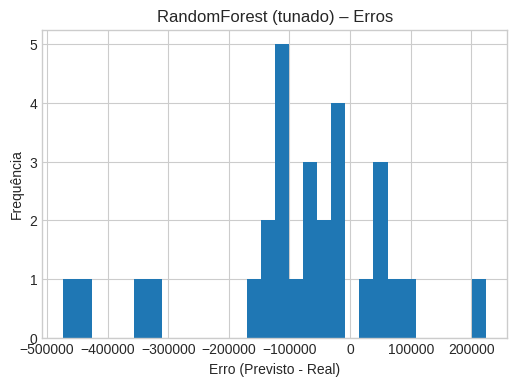

In [30]:
param_grid = {
    "model__n_estimators": [200, 400, 700],
    "model__max_depth": [None, 8, 16],
    "model__min_samples_split": [2, 5, 10]
}

pipe_rf_tune = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1))
])

grid = GridSearchCV(
    estimator=pipe_rf_tune,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # MAE
    cv=5,
    n_jobs=-1,
    verbose=0
)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
best_model = grid.best_estimator_

pred_best = best_model.predict(X_test)
_ = avalia_modelo("RandomForest(tunado)", y_test, pred_best)

plot_real_previsto(y_test, pred_best, "RandomForest (tunado) – Real x Previsto")
plot_residuos(y_test, pred_best, "RandomForest (tunado) – Erros")


8) Exportar artefatos (modelo, previsões e dados prontos)

In [31]:
os.makedirs("artefatos", exist_ok=True)

# salva o modelo tunado
joblib.dump(best_model, "artefatos/modelo_randomforest_tunado.pkl")

# salva previsões de teste
out = pd.DataFrame({
    "y_real": y_test.values,
    "y_previsto": pred_best
})
out.to_parquet("artefatos/previsoes_teste.parquet", index=False)

# opcional: salva X_train/X_test prontos (transformados) – útil para auditoria
# Atenção: isso materializa os dados transformados (após one-hot/escala)
Xt_train = best_model.named_steps["prep"].fit_transform(X_train)
Xt_test  = best_model.named_steps["prep"].transform(X_test)

pd.DataFrame(Xt_train).to_parquet("artefatos/X_train_transformado.parquet", index=False)
pd.DataFrame(Xt_test).to_parquet("artefatos/X_test_transformado.parquet", index=False)

print("✅ Artefatos salvos na pasta /artefatos")


✅ Artefatos salvos na pasta /artefatos


⚙️ 5.1. Importação dos Modelos

In [34]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


📊 Comparativo (ordenado por RMSE):


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


,Modelo,RMSE,MAE,R²
0,XGBoost,7.185216e+04,5.282819e+04,0.786551
1,Random Forest,8.622731e+04,6.038774e+04,0.692600
2,Linear Regression,1.163937e+05,9.139567e+04,0.439890
3,Neural Network (MLP),1.565416e+06,1.557852e+06,-100.315018


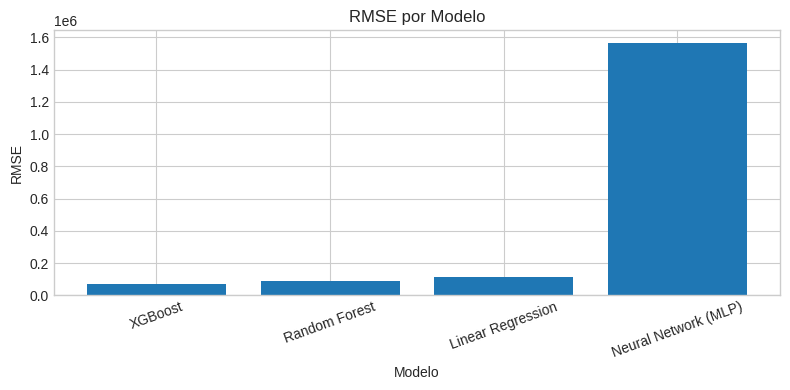

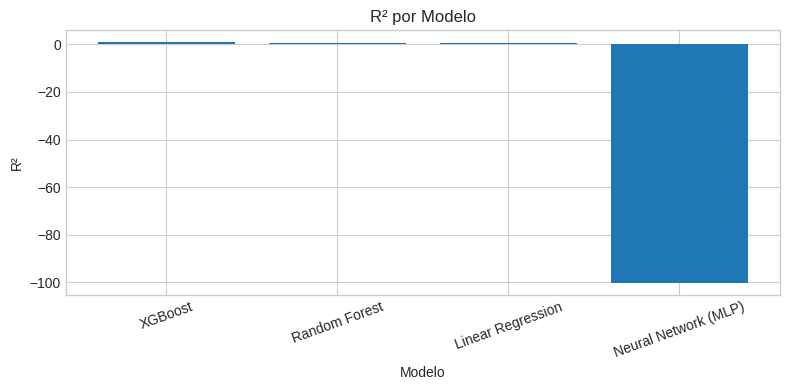

✅ Melhor baseline: XGBoost | RMSE=71852.16 | MAE=52828.19 | R²=0.787
Próximo passo: ajuste de hiperparâmetros com validação cruzada.


In [37]:
# === 5.y Treino de múltiplos modelos + comparação + gráfico ===
# === Bloco completo (compatível com qualquer versão do sklearn) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse_compat(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))

def avaliar(nome, y_true, y_pred, resultados):
    resultados.append({
        "Modelo": nome,
        "RMSE": rmse_compat(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred),
    })

def _prepare_with_dates(Xtr_in, Xte_in):
    Xtr, Xte = Xtr_in.copy(), Xte_in.copy()
    if 'Date' in Xtr.columns:
        for df in (Xtr, Xte):
            df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
            if df['Date'].isna().any():
                med = df['Date'].dropna().median()
                df['Date'] = df['Date'].fillna(med)
        for df in (Xtr, Xte):
            df['year']       = df['Date'].dt.year
            df['month']      = df['Date'].dt.month
            df['day']        = df['Date'].dt.day
            df['dayofweek']  = df['Date'].dt.dayofweek
            df['weekofyear'] = df['Date'].dt.isocalendar().week.astype(int)
            df['month_sin']     = np.sin(2*np.pi*df['month']/12)
            df['month_cos']     = np.cos(2*np.pi*df['month']/12)
            df['dayofweek_sin'] = np.sin(2*np.pi*df['dayofweek']/7)
            df['dayofweek_cos'] = np.cos(2*np.pi*df['dayofweek']/7)
        Xtr = Xtr.drop(columns=['Date'])
        Xte = Xte.drop(columns=['Date'])
    obj_cols = sorted(set(Xtr.select_dtypes('object').columns)|set(Xte.select_dtypes('object').columns))
    if obj_cols:
        Xtr = pd.get_dummies(Xtr, columns=obj_cols, drop_first=True)
        Xte = pd.get_dummies(Xte, columns=obj_cols, drop_first=True)
        Xtr, Xte = Xtr.align(Xte, join='left', axis=1, fill_value=0)
    return Xtr, Xte

try:
    Xtr; Xte
except NameError:
    Xtr, Xte = _prepare_with_dates(X_train, X_test)

resultados = []

# Linear Regression
lr = LinearRegression().fit(Xtr, y_train)
avaliar("Linear Regression", y_test, lr.predict(Xte), resultados)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=400, n_jobs=-1).fit(Xtr, y_train)
avaliar("Random Forest", y_test, rf.predict(Xte), resultados)

# XGBoost (opcional)
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(
        random_state=42, n_estimators=600, learning_rate=0.05,
        max_depth=6, subsample=0.8, colsample_bytree=0.8,
        n_jobs=-1, reg_lambda=1.0, tree_method="hist"
    ).fit(Xtr, y_train)
    avaliar("XGBoost", y_test, xgb.predict(Xte), resultados)
except Exception as e:
    print("⚠️ XGBoost indisponível/erro. Omitindo da comparação.")
    print("Detalhe:", e)

# MLP com StandardScaler
mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(hidden_layer_sizes=(128,64),
                         activation="relu", solver="adam",
                         learning_rate_init=0.001, max_iter=800,
                         random_state=42))
]).fit(Xtr, y_train)
avaliar("Neural Network (MLP)", y_test, mlp_pipe.predict(Xte), resultados)

# Comparação
df_res = pd.DataFrame(resultados).sort_values("RMSE").reset_index(drop=True)
print("📊 Comparativo (ordenado por RMSE):")
display(df_res)

plt.figure(figsize=(8,4)); plt.bar(df_res["Modelo"], df_res["RMSE"])
plt.title("RMSE por Modelo"); plt.xlabel("Modelo"); plt.ylabel("RMSE"); plt.xticks(rotation=20); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4)); plt.bar(df_res["Modelo"], df_res["R²"])
plt.title("R² por Modelo"); plt.xlabel("Modelo"); plt.ylabel("R²"); plt.xticks(rotation=20); plt.tight_layout(); plt.show()

best = df_res.iloc[0]
print(f"✅ Melhor baseline: {best['Modelo']} | RMSE={best['RMSE']:.2f} | MAE={best['MAE']:.2f} | R²={best['R²']:.3f}")
print("Próximo passo: ajuste de hiperparâmetros com validação cruzada.")


X_train: (114, 5) | X_test: (29, 5)
Fitting 5 folds for each of 40 candidates, totalling 200 fits

✅ RandomizedSearchCV concluído em 17.5s
Melhores parâmetros:
{'model__colsample_bytree': np.float64(0.8080272084711243), 'model__learning_rate': np.float64(0.14667756983581992), 'model__max_depth': 8, 'model__min_child_weight': 2, 'model__n_estimators': 929, 'model__reg_lambda': np.float64(1.349262400109297), 'model__subsample': np.float64(0.7580600944007257)}
Melhor MAE (CV): 112632.1247


,mean_test_score,std_test_score,mean_train_score,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__subsample,param_model__colsample_bytree,param_model__min_child_weight,param_model__reg_lambda
7,-112632.124684,52857.314924,-0.307812,929,8,0.146678,0.758060,0.808027,2,1.349262
26,-113506.746789,54460.961822,-275.016273,545,6,0.091490,0.690598,0.943344,3,1.536279
19,-113705.016579,53802.748783,-11762.704316,558,11,0.010130,0.813636,0.859076,3,0.493968
22,-114422.421053,55805.045011,-541.652396,419,4,0.076695,0.711459,0.999096,2,0.154436
39,-115002.413526,51901.204258,-11.553488,315,5,0.148191,0.754039,0.732300,1,0.883347
11,-115653.232895,53619.550853,-8417.438025,591,5,0.013520,0.908508,0.717395,1,2.187022
6,-115907.115000,53350.978109,-18821.156383,761,3,0.018597,0.724684,0.798071,4,1.987567
2,-115980.695737,50450.247154,-27.127816,659,7,0.063085,0.602827,0.932977,1,1.834959
5,-116037.953421,48311.144704,-34025.056171,291,4,0.013992,0.648815,0.754167,4,1.320457
29,-116116.944368,55782.520135,-0.622452,771,11,0.214306,0.998501,0.863994,4,0.782488



📏 Avaliação em Holdout (dados não vistos):
MAE  : 202318.6771
RMSE : 237687.4906
R²   : -1.1284


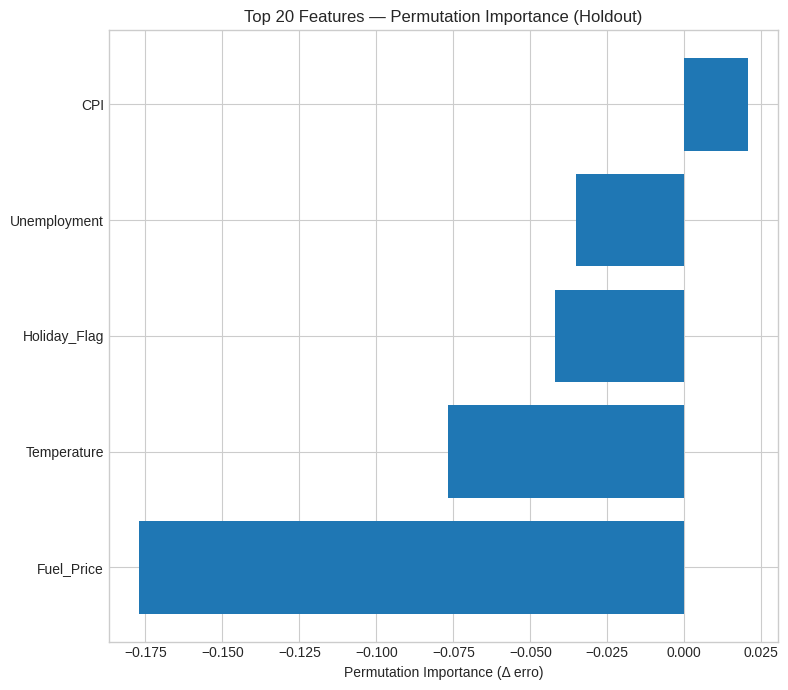


📦 Artefatos salvos:
- xgb_sales_best_pipeline.joblib
- feature_importance_permutation.csv
- predicoes_holdout.csv


In [40]:
# ============================================
# 🚀 Etapa 6 — Fine Tuning (Colab-ready, sklearn 1.6+)
# RandomizedSearchCV + Permutation Importance + Retraining Final
# ============================================

# Se precisar:
# !pip -q install xgboost==2.0.3 joblib==1.4.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import time
from scipy.stats import uniform, randint

from sklearn.model_selection import (
    RandomizedSearchCV, KFold, TimeSeriesSplit, train_test_split
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# ✅ RMSE compatível com sklearn 1.6+ e versões anteriores
try:
    from sklearn.metrics import root_mean_squared_error as _rmse
    def compute_rmse(y_true, y_pred):
        return _rmse(y_true, y_pred)
except Exception:
    def compute_rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

from xgboost import XGBRegressor

# -----------------------------
# 🔧 Parâmetros principais
# -----------------------------
RANDOM_STATE = 42
TARGET_COL = "Weekly_Sales"    # <- ajuste se sua coluna-alvo tiver outro nome
DATE_COL_CANDIDATES = ["Date", "date", "ds"]
TEST_SIZE = 0.2
N_ITER_SEARCH = 40
CV_SPLITS = 5

np.random.seed(RANDOM_STATE)

# -----------------------------
# 🧼 0) Organização do dataset
# -----------------------------
assert TARGET_COL in df.columns, f"Coluna alvo '{TARGET_COL}' não encontrada."

# Detecta coluna de data (se houver)
date_col = next((c for c in DATE_COL_CANDIDATES if c in df.columns), None)

df_work = df.copy()
if date_col is not None:
    df_work[date_col] = pd.to_datetime(df_work[date_col], errors="coerce")
    df_work = df_work.sort_values(date_col).reset_index(drop=True)

y = df_work[TARGET_COL].astype(float)
X = df_work.drop(columns=[TARGET_COL])

# Tipos
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number, "float64", "int64", "float32", "int32"]).columns.tolist()

# Remove a coluna de data bruta do X
if date_col is not None and date_col in X.columns:
    X = X.drop(columns=[date_col])
    if date_col in cat_cols: cat_cols.remove(date_col)
    if date_col in num_cols: num_cols.remove(date_col)

# -----------------------------
# ✂️ 1) Split treino/teste
# -----------------------------
if date_col is not None:
    cutoff = int((1 - TEST_SIZE) * len(df_work))
    X_train, X_test = X.iloc[:cutoff, :], X.iloc[cutoff:, :]
    y_train, y_test = y.iloc[:cutoff], y.iloc[cutoff:]
    cv_strategy = TimeSeriesSplit(n_splits=CV_SPLITS)
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    cv_strategy = KFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)

print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")

# -----------------------------
# 🧱 2) Pipeline + Pré-processamento
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=RANDOM_STATE,
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="hist",
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", xgb)
])

# -----------------------------
# 🎯 3) Espaço de busca
# -----------------------------
param_distributions = {
    "model__n_estimators": randint(200, 1200),
    "model__max_depth": randint(3, 12),
    "model__learning_rate": uniform(0.01, 0.25),
    "model__subsample": uniform(0.6, 0.4),        # 0.6 a 1.0
    "model__colsample_bytree": uniform(0.6, 0.4), # 0.6 a 1.0
    "model__min_child_weight": randint(1, 10),
    "model__reg_lambda": uniform(0.0, 3.0),
}

scoring = "neg_mean_absolute_error"

# -----------------------------
# 🚦 4) RandomizedSearchCV
# -----------------------------
start = time.time()
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=N_ITER_SEARCH,
    scoring=scoring,
    cv=cv_strategy,
    random_state=RANDOM_STATE,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

search.fit(X_train, y_train)
elapsed = time.time() - start
print(f"\n✅ RandomizedSearchCV concluído em {elapsed:.1f}s")
print("Melhores parâmetros:")
print(search.best_params_)
print(f"Melhor MAE (CV): {-search.best_score_:.4f}")

# Resultados resumidos (top 10)
cv_results = pd.DataFrame(search.cv_results_)
cols_show = [
    "mean_test_score","std_test_score","mean_train_score",
    "param_model__n_estimators","param_model__max_depth",
    "param_model__learning_rate","param_model__subsample",
    "param_model__colsample_bytree","param_model__min_child_weight",
    "param_model__reg_lambda"
]
display(cv_results[cols_show].sort_values("mean_test_score", ascending=False).head(10))

# -----------------------------
# 🏋️ 5) Retraining final
# -----------------------------
best_pipe = search.best_estimator_
best_pipe.fit(X_train, y_train)

# Avaliação (compatível com sklearn 1.6+)
preds = best_pipe.predict(X_test)
mae  = mean_absolute_error(y_test, preds)
rmse = compute_rmse(y_test, preds)
r2   = r2_score(y_test, preds)

print("\n📏 Avaliação em Holdout (dados não vistos):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# -----------------------------
# 🔍 6) Feature Importance (Permutation Importance)
# -----------------------------
feature_names = best_pipe.named_steps["prep"].get_feature_names_out()
perm = permutation_importance(
    best_pipe, X_test, y_test,
    n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1
)

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

top_n = 20
imp_top = imp_df.head(top_n).iloc[::-1]

plt.figure(figsize=(8, max(4, top_n*0.35)))
plt.barh(imp_top["feature"], imp_top["importance_mean"])
plt.xlabel("Permutation Importance (Δ erro)")
plt.title(f"Top {top_n} Features — Permutation Importance (Holdout)")
plt.tight_layout()
plt.show()

# -----------------------------
# 💾 7) Exporta artefatos
# -----------------------------
joblib.dump(best_pipe, "xgb_sales_best_pipeline.joblib")
imp_df.to_csv("feature_importance_permutation.csv", index=False)

preds_df = pd.DataFrame({"y_true": y_test.values, "y_pred": preds})
if date_col is not None:
    preds_df[date_col] = df_work.loc[y_test.index, date_col].values
preds_df.to_csv("predicoes_holdout.csv", index=False)

print("\n📦 Artefatos salvos:")
print("- xgb_sales_best_pipeline.joblib")
print("- feature_importance_permutation.csv")
print("- predicoes_holdout.csv")


In [44]:
import sklearn; print(sklearn.__version__)

1.6.1


In [50]:
# =========================== 📦 ETAPA 7 — Persistência e Exportação ===========================
# - Salva modelo final (model.pkl)
# - Salva dataset final + predições (predicoes.parquet)
# - Gera gráficos PNG (para Streamlit) e um índice plots_index.json
# ----------------------------------------------------------------------------------------------
import os, json, hashlib, joblib, numpy as np, pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SkPipeline

# ======================= (opcional) Config MANUAL — preencha se quiser ========================
# target_col = "Weekly_Sales"
# feature_cols = ["Temperature","Fuel_Price","CPI","Unemployment","Holiday_Flag","Date"]
# df_final = df.copy()
# pipeline = pipeline
# metrics = {"rmse": ..., "mae": ..., "r2": ...}

# ======================= Auto-INFERÊNCIA (usa o que existir no notebook) ======================
G = globals()

# 1) pipeline
if "pipeline" in G:
    pipeline = G["pipeline"]
else:
    for cand in ("best_pipeline","final_pipeline","best_model","model"):
        if cand in G:
            pipeline = G[cand]
            break
if "pipeline" not in locals():
    raise RuntimeError("Não encontrei um pipeline treinado. Defina `pipeline` antes da Etapa 7.")

# 2) feature_cols
feature_cols = G.get("feature_cols", None)
if feature_cols is None:
    if "X_train" in G and hasattr(G["X_train"], "columns"):
        feature_cols = G["X_train"].columns.tolist()
    elif "X" in G and hasattr(G["X"], "columns"):
        feature_cols = G["X"].columns.tolist()

# 3) target_col
target_col = G.get("target_col", None)
if target_col is None:
    for yname in ("y_train","y","target"):
        if yname in G:
            yobj = G[yname]
            target_col = getattr(yobj, "name", None) or "target"
            break

# 4) df_final
if "df_final" in G:
    df_final = G["df_final"].copy()
else:
    if "X_train" in G and "y_train" in G:
        df_final = pd.DataFrame(G["X_train"]).copy()
        if target_col is None or target_col == "target":
            target_col = getattr(G["y_train"], "name", None) or "target"
        df_final[target_col] = np.array(G["y_train"])
    elif "X" in G and "y" in G:
        df_final = pd.DataFrame(G["X"]).copy()
        if target_col is None or target_col == "target":
            target_col = getattr(G["y"], "name", None) or "target"
        df_final[target_col] = np.array(G["y"])
    elif "df" in G and isinstance(G["df"], pd.DataFrame):
        df_df = G["df"]
        if feature_cols and target_col and set([*feature_cols, target_col]).issubset(df_df.columns):
            df_final = df_df.copy()
        else:
            possiveis = df_df.select_dtypes(include=[np.number]).columns.tolist()
            if len(possiveis) >= 1:
                if target_col is None:
                    target_col = possiveis[-1]
                if feature_cols is None:
                    feature_cols = [c for c in possiveis if c != target_col]
                df_final = df_df.copy()
    else:
        raise RuntimeError(
            "Não consegui inferir `df_final`. "
            "Defina manualmente: df_final (DataFrame), feature_cols (list[str]) e target_col (str)."
        )

if feature_cols is None or target_col is None:
    raise RuntimeError("Faltam `feature_cols` e/ou `target_col`. Defina-os antes de continuar.")

# =============================== Pastas de artefatos =========================================
ARTIFACT_DIR = "artifacts"
PLOTS_DIR = os.path.join(ARTIFACT_DIR, "plots")
DATA_DIR  = os.path.join(ARTIFACT_DIR, "data")
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

# =================================== Salvar MODELO ===========================================
model_path = os.path.join(ARTIFACT_DIR, "model.pkl")
joblib.dump(pipeline, model_path)

meta = {
    "saved_at": datetime.now().isoformat(timespec="seconds"),
    "sklearn_version": __import__("sklearn").__version__,
    "python_version": f"{__import__('sys').version_info.major}.{__import__('sys').version_info.minor}",
    "n_rows": int(len(df_final)),
    "n_features": int(len(feature_cols)),
    "target": target_col,
    "feature_cols": feature_cols,
    "artifact_dir": os.path.abspath(ARTIFACT_DIR)
}
with open(os.path.join(ARTIFACT_DIR, "model_meta.json"), "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

# ========================= 🔧 Compat: alinhar colunas esperadas ===============================
def _expected_input_cols(pipeline):
    prep = getattr(pipeline, "named_steps", {}).get("prep", None)
    if prep is not None and hasattr(prep, "feature_names_in_"):
        return list(prep.feature_names_in_)
    if hasattr(pipeline, "feature_names_in_"):
        return list(pipeline.feature_names_in_)
    if 'feature_cols' in globals() and isinstance(feature_cols, (list, tuple)):
        return list(feature_cols)
    raise RuntimeError("Não foi possível detectar as colunas esperadas pelo pipeline.")

expected_cols = _expected_input_cols(pipeline)

def _coerce_datetime(s: pd.Series) -> pd.Series:
    if pd.api.types.is_datetime64_any_dtype(s):
        return s.astype("datetime64[ns]")
    s_dt = pd.to_datetime(s, errors="coerce", dayfirst=True, infer_datetime_format=True)
    if s_dt.isna().any():
        mask = s_dt.isna()
        s_dt.loc[mask] = pd.to_datetime(s.loc[mask], errors="coerce", dayfirst=False, infer_datetime_format=True)
    if s_dt.isna().any():
        for fmt in ("%d-%m-%Y","%m-%d-%Y","%Y-%m-%d","%d/%m/%Y","%m/%d/%Y"):
            mask = s_dt.isna()
            if not mask.any(): break
            try:
                s_dt.loc[mask] = pd.to_datetime(s.loc[mask], format=fmt, errors="coerce")
            except Exception:
                pass
    return s_dt.astype("datetime64[ns]")

aliases = {"Date": ["date", "Data", "dt", "data", "DATE"]}

missing = set(expected_cols) - set(df_final.columns)
if missing:
    for col in list(missing):
        if col in aliases:
            found = next((alt for alt in aliases[col] if alt in df_final.columns), None)
            if found is not None:
                val = df_final[found]
                df_final[col] = _coerce_datetime(val) if "date" in col.lower() else val
                missing.discard(col)
    for col in list(missing):
        df_final[col] = pd.NaT if "date" in col.lower() else np.nan

for col in expected_cols:
    if "date" in col.lower():
        df_final[col] = _coerce_datetime(df_final[col])

X_all = df_final.reindex(columns=expected_cols)

if target_col not in df_final.columns:
    raise RuntimeError(f"Coluna alvo '{target_col}' não está em df_final.")
y_all = df_final[target_col].copy()

# ========== 🔧 Patch robusto: se 'Date' foi categorizada no treino, gerar STRING compatível ===
import re

def _find_encoder_and_local_index(prep: ColumnTransformer, colname: str):
    """
    Procura por OneHotEncoder/OrdinalEncoder que processe 'colname' dentro do ColumnTransformer.
    Retorna (encoder, j_local) onde j_local é o índice da coluna dentro do encoder (não cumulativo).
    Se não achar, retorna (None, None).
    """
    if not isinstance(prep, ColumnTransformer):
        return None, None

    for name, trans, cols in getattr(prep, "transformers_", []):
        if name == "remainder":
            continue
        # normaliza lista de colunas
        if isinstance(cols, (list, tuple, np.ndarray, pd.Index)):
            cols_list = list(cols)
        else:
            continue

        # desce em Pipeline para achar o encoder
        enc = trans
        if isinstance(trans, SkPipeline):
            for step_name, step in trans.steps:
                if step.__class__.__name__ in ("OneHotEncoder", "OrdinalEncoder"):
                    enc = step
                    break

        # se de fato é um encoder e colname está aqui, devolve índice local
        if hasattr(enc, "categories_") and colname in cols_list:
            j_local = cols_list.index(colname)
            # sanity check: algumas vezes o encoder recebeu uma única coluna => categories_ de len 1
            if j_local >= len(enc.categories_):
                # índice local maior que o esperado → algo não bate; aborta (vai cair no fallback)
                return None, None
            return enc, j_local

    return None, None

def _guess_fmt_from_example(s: str) -> str:
    if isinstance(s, str):
        if re.match(r"^\d{2}-\d{2}-\d{4}$", s): return "%d-%m-%Y"
        if re.match(r"^\d{4}-\d{2}-\d{2}$", s): return "%Y-%m-%d"
        if re.match(r"^\d{2}/\d{2}/\d{4}$", s): return "%d/%m/%Y"
    return "%Y-%m-%d"

prep = getattr(pipeline, "named_steps", {}).get("prep", None)
enc, j_local = _find_encoder_and_local_index(prep, "Date") if prep is not None else (None, None)

if "Date" in X_all.columns:
    if enc is not None and j_local is not None:
        try:
            cats = enc.categories_[j_local]
            example = next((v for v in cats if isinstance(v, str) and len(v) >= 8), None)
            fmt = _guess_fmt_from_example(example)
            # transformar para STRING no formato das categorias do treino
            if pd.api.types.is_datetime64_any_dtype(X_all["Date"]):
                X_all["Date"] = X_all["Date"].dt.strftime(fmt)
            else:
                tmp = pd.to_datetime(X_all["Date"], errors="coerce", dayfirst=True, infer_datetime_format=True)
                mask = tmp.isna()
                if mask.any():
                    tmp.loc[mask] = pd.to_datetime(X_all.loc[mask, "Date"], errors="coerce", dayfirst=False, infer_datetime_format=True)
                X_all["Date"] = tmp.dt.strftime(fmt)
        except Exception:
            # qualquer problema, cai no modo datetime (fallback seguro)
            if not pd.api.types.is_datetime64_any_dtype(X_all["Date"]):
                X_all["Date"] = pd.to_datetime(X_all["Date"], errors="coerce", dayfirst=True, infer_datetime_format=True)
    else:
        # não foi categorizada no treino → mantenha datetime
        if not pd.api.types.is_datetime64_any_dtype(X_all["Date"]):
            X_all["Date"] = pd.to_datetime(X_all["Date"], errors="coerce", dayfirst=True, infer_datetime_format=True)

# =================================== ### 🔮 PREDICT ===========================================
y_pred = pipeline.predict(X_all)

# ======================== Salvar parquet com predições =======================================
df_pred = df_final.copy()
df_pred["y_true"] = y_all
df_pred["y_pred"] = y_pred
df_pred["error"]  = df_pred["y_pred"] - df_pred["y_true"]

def _row_hash(df: pd.DataFrame) -> pd.Series:
    # hash por linha (uint64) e formata em hexa estável; sem converter para int64
    h = pd.util.hash_pandas_object(df.astype("string"), index=False)   # Series[uint64]
    return h.map(lambda v: f"{np.uint64(v):016x}")[:].str[:12]         # 12 chars é suficiente p/ id curto

# use normalmente:
df_pred["_row_hash"] = _row_hash(df_pred[expected_cols])

pred_path = os.path.join(DATA_DIR, "predicoes.parquet")
df_pred.to_parquet(pred_path, index=False)

# =========================== Métricas (cria se não existir) ==================================
if "metrics" in G and isinstance(G["metrics"], dict):
    metrics = G["metrics"]
else:
    metrics = {}
    try:
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        metrics.update({
            "mae": float(mean_absolute_error(y_all, y_pred)),
            "rmse": float(np.sqrt(mean_squared_error(y_all, y_pred))),
            "r2": float(r2_score(y_all, y_pred)),
        })
    except Exception:
        pass

with open(os.path.join(ARTIFACT_DIR, "metrics.json"), "w", encoding="utf-8") as f:
    json.dump(metrics, f, ensure_ascii=False, indent=2)

# ============================== Gráficos para Streamlit ======================================
plt.ioff()

def _save_plot(fig, name):
    path = os.path.join(PLOTS_DIR, f"{name}.png")
    fig.savefig(path, bbox_inches="tight", dpi=140)
    plt.close(fig)
    return path

# 1) Predição vs Real
fig1 = plt.figure(figsize=(6,5))
plt.scatter(df_pred["y_true"], df_pred["y_pred"], alpha=0.6)
mn = float(np.nanmin([df_pred["y_true"].min(), df_pred["y_pred"].min()]))
mx = float(np.nanmax([df_pred["y_true"].max(), df_pred["y_pred"].max()]))
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Valor real"); plt.ylabel("Predição"); plt.title("Predição vs Valor Real")
plot_pred_vs_real = _save_plot(fig1, "pred_vs_real")

# 2) Resíduos vs Predição
fig2 = plt.figure(figsize=(6,5))
plt.scatter(df_pred["y_pred"], df_pred["error"], alpha=0.6)
plt.axhline(0)
plt.xlabel("Predição"); plt.ylabel("Resíduo (y_pred - y_true)"); plt.title("Resíduos vs Predição")
plot_residuos = _save_plot(fig2, "residuos_vs_pred")

# 3) Distribuição de Erros
fig3 = plt.figure(figsize=(6,5))
plt.hist(df_pred["error"], bins=40)
plt.xlabel("Erro"); plt.ylabel("Frequência"); plt.title("Distribuição de Erros")
plot_dist_erros = _save_plot(fig3, "distribuicao_erros")

# 4) Importância de features
from sklearn.inspection import permutation_importance
def feature_importances(pipeline, X: pd.DataFrame, y: pd.Series, n_repeats=5, random_state=42):
    model = getattr(pipeline, "named_steps", {}).get("model", pipeline)
    cols = X.columns.tolist()
    if hasattr(model, "feature_importances_"):
        imp = np.array(model.feature_importances_, dtype=float)
        return pd.DataFrame({"feature": cols, "importance": imp}).sort_values("importance", ascending=False)
    if hasattr(model, "coef_"):
        coef = np.ravel(model.coef_).astype(float)
        imp = np.abs(coef)
        return pd.DataFrame({"feature": cols, "importance": imp}).sort_values("importance", ascending=False)
    pi = permutation_importance(pipeline, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=-1)
    imp = np.abs(pi.importances_mean)
    return pd.DataFrame({"feature": cols, "importance": imp}).sort_values("importance", ascending=False)

fi = feature_importances(pipeline, X_all, y_all).head(20)
fig4 = plt.figure(figsize=(7,6))
plt.barh(fi["feature"][::-1], fi["importance"][::-1])
plt.xlabel("Importância"); plt.title("Importância das Variáveis (Top 20)")
plot_importancias = _save_plot(fig4, "importancia_features")

# Índice de plots
plots_index = {
    "generated_at": datetime.now().isoformat(timespec="seconds"),
    "plots": [
        {"name": "Predição vs Real", "file": os.path.relpath(plot_pred_vs_real, ARTIFACT_DIR)},
        {"name": "Resíduos vs Pred", "file": os.path.relpath(plot_residuos, ARTIFACT_DIR)},
        {"name": "Distribuição de Erros", "file": os.path.relpath(plot_dist_erros, ARTIFACT_DIR)},
        {"name": "Importância de Features (Top 20)", "file": os.path.relpath(plot_importancias, ARTIFACT_DIR)},
    ]
}
with open(os.path.join(ARTIFACT_DIR, "plots_index.json"), "w", encoding="utf-8") as f:
    json.dump(plots_index, f, ensure_ascii=False, indent=2)

print("✅ Modelo salvo em:", model_path)
print("✅ Predições salvas em:", os.path.join(DATA_DIR, "predicoes.parquet"))
print("✅ Plots em:", PLOTS_DIR)
# =============================================================================================


ValueError: All arrays must be of the same length